# Markov Google

This notebook uses Markov Chains to find the PageRank of a network.  

The user must supply the adjacency matrix. 

Created by Tim Chartier. 

In [1]:
import sys
!{sys.executable} -m pip install numpy matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np

### Create adjacency matrix

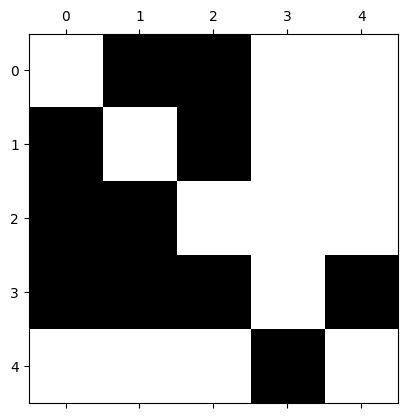

In [3]:
# @oktsa78
# @georgiatsa
# @northcarolina
# @oktsa.memes
# @duncan_oktsa

A = np.array([
    [0,1,1,0,0],
    [1,0,1,0,0],
    [1,1,0,0,0],
    [1,1,1,0,1],
    [0,0,0,1,0],
    ])

# Create a random adjacency matrix
# import random 
# A = (np.random.rand(500,500) > .9).astype(int)

# Spy plot the matrix
import matplotlib.pylab as plt
message = plt.spy(A)

### Construct the Google matrix

In [4]:
# Grab the size of the network
sizeOfNetwork = len(A)
# Remove loops (links to one's own webpage)
A = A - np.diag(np.diag(A))

In [5]:
alpha = 0.85 # teleportation parameter
rowSum = np.sum(A,1) # Compute the row sums
G = np.zeros((sizeOfNetwork,sizeOfNetwork)) # initalize the Google matrix 
for i in range(sizeOfNetwork):
    if (rowSum[i] == 0): # dangling node
       G[i,:] = np.ones((1,sizeOfNetwork))/sizeOfNetwork
    else:
       G[i,:] = alpha*A[i,:]/rowSum[i] + (1-alpha)/sizeOfNetwork
print('G = \n',G)

G = 
 [[0.03   0.455  0.455  0.03   0.03  ]
 [0.455  0.03   0.455  0.03   0.03  ]
 [0.455  0.455  0.03   0.03   0.03  ]
 [0.2425 0.2425 0.2425 0.03   0.2425]
 [0.03   0.03   0.03   0.88   0.03  ]]


### Loop to compute PageRank

In [6]:
numberOfLoops = 100
v0 = np.zeros(sizeOfNetwork) # initial state
v0[np.random.randint(sizeOfNetwork)] = 1 # create a random webpage on which to start
v = v0
for i in range(numberOfLoops):
    v = v@G

### Sort and print PageRank

In [7]:
iSort = np.argsort(-v)   # the -v gives us a reverse sort and np.argsort gives us the indices of the sort
print('Page  PageRank  \n===============')
for i in range(sizeOfNetwork):
    print(f'{iSort[i]:3d}   {v[iSort[i]]:7.5f}')

Page  PageRank  
  1   0.29596
  0   0.29596
  2   0.29596
  3   0.06773
  4   0.04439


### Graph the PageRank

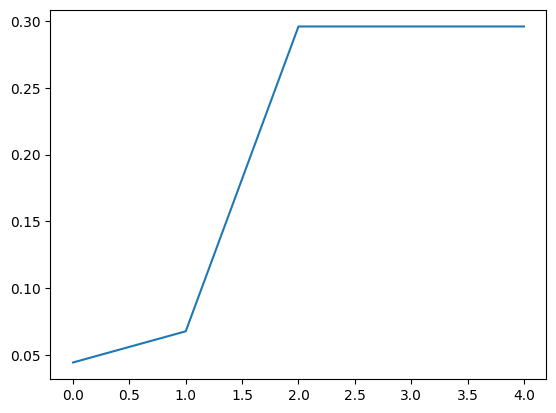

In [8]:
import matplotlib.pyplot as plt
plt.plot(sorted(v))
plt.show()